## Bussiness License Status Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split as tt
from sklearn.metrics import accuracy_score, classification_report
from datetime import datetime as dt

In [2]:
train=pd.read_csv('/content/train_file.csv')
train.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623.0,...,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,25.0,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,...,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,60.0,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,...,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,...,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,...,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI


In [3]:
test=pd.read_csv('/content/test_file.csv')
test.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION
0,1516615-20120216,2132209,280120,1,RS HOMES I LLC,RS HOMES I LLC,350 W HUBBARD ST 3 300,CHICAGO,IL,60610.0,...,N,2012-02-16T00:00:00,2014-02-15T00:00:00,2012-01-19T00:00:00,2012-01-20T00:00:00,2012-12-29T00:00:00,NaN,41.890047,-87.637467,"{'latitude': '41.89004724888915', 'longitude':..."
1,69813-20110616,2090759,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,2101 W 59TH ST 1ST,CHICAGO,IL,60636.0,...,N,2011-06-16T00:00:00,2013-06-15T00:00:00,2012-11-02T00:00:00,2012-11-05T00:00:00,2012-12-29T00:00:00,NaN,41.786485,-87.676665,"{'latitude': '41.786485235679486', 'longitude'..."
2,1519227-20041116,1541990,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,1133 S WABASH AVE 1ST,CHICAGO,IL,60605.0,...,N,2004-11-16T00:00:00,2005-11-15T00:00:00,2004-12-06T00:00:00,2004-12-07T00:00:00,NaN,NaN,41.868269,-87.625695,"{'latitude': '41.86826924843568', 'longitude':..."
3,1922025-20100816,2041053,335243,1,ANNA F. JAMISON,ANNA F. JAMISON,13156 S FORRESTVILLE AVE,CHICAGO,IL,60827.0,...,N,2010-08-16T00:00:00,2012-08-15T00:00:00,NaN,2010-11-04T00:00:00,2012-12-31T00:00:00,NaN,41.655762,-87.608686,"{'latitude': '41.65576175146191', 'longitude':..."
4,1675683-20070816,1837158,283018,3,MARINCA A. COVARRUBIAS,DETAILS,4208 S ARCHER AVE,CHICAGO,IL,60632.0,...,N,2007-08-16T00:00:00,2009-06-15T00:00:00,2007-08-15T00:00:00,2007-08-16T00:00:00,2008-03-26T00:00:00,39.0,41.816969,-87.699785,"{'latitude': '41.81696910012824', 'longitude':..."


In [4]:
submission=pd.read_csv('/content/sample_submission.csv')
submission.head()

,ID,LICENSE STATUS
0,1985799-20091116,AAC
1,1932144-20090416,AAI
2,71173-20100816,REV
3,1802721-20110616,REV
4,2048542-20120816,IN


## Extrapolatory Data Analysis

In [5]:
train.shape

(85895, 32)

In [6]:
train.columns

Index(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME',
       'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE',
       'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE',
       'LICENSE DESCRIPTION', 'LICENSE NUMBER', 'APPLICATION TYPE',
       'APPLICATION CREATED DATE', 'APPLICATION REQUIREMENTS COMPLETE',
       'PAYMENT DATE', 'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE',
       'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE',
       'DATE ISSUED', 'LICENSE STATUS CHANGE DATE', 'SSA', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'LICENSE STATUS'],
      dtype='object')

In [7]:
train.dtypes.value_counts()

object     21
float64     7
int64       4
dtype: int64

### Percentage of missing null values training data

In [8]:
train.isnull().sum().sort_values(ascending=False) * 100 / len(train)

SSA                                  88.999360
APPLICATION CREATED DATE             75.277956
PRECINCT                             66.011991
LICENSE STATUS CHANGE DATE           64.497351
POLICE DISTRICT                      62.881425
WARD                                 57.862507
WARD PRECINCT                        57.861342
LOCATION                             55.004366
LONGITUDE                            55.004366
LATITUDE                             55.004366
LICENSE APPROVED FOR ISSUANCE         7.903836
PAYMENT DATE                          1.500669
LICENSE TERM START DATE               0.265440
APPLICATION REQUIREMENTS COMPLETE     0.249141
ZIP CODE                              0.036091
LICENSE TERM EXPIRATION DATE          0.020956
DOING BUSINESS AS NAME                0.001164
LICENSE NUMBER                        0.001164
DATE ISSUED                           0.000000
CONDITIONAL APPROVAL                  0.000000
ID                                    0.000000
APPLICATION T

In [9]:
train.dtypes

ID                                    object
LICENSE ID                             int64
ACCOUNT NUMBER                         int64
SITE NUMBER                            int64
LEGAL NAME                            object
DOING BUSINESS AS NAME                object
ADDRESS                               object
CITY                                  object
STATE                                 object
ZIP CODE                              object
WARD                                 float64
PRECINCT                             float64
WARD PRECINCT                         object
POLICE DISTRICT                      float64
LICENSE CODE                           int64
LICENSE DESCRIPTION                   object
LICENSE NUMBER                       float64
APPLICATION TYPE                      object
APPLICATION CREATED DATE              object
APPLICATION REQUIREMENTS COMPLETE     object
PAYMENT DATE                          object
CONDITIONAL APPROVAL                  object
LICENSE TE

In [10]:
train.nunique()

ID                                   85895
LICENSE ID                           85895
ACCOUNT NUMBER                       38897
SITE NUMBER                            177
LEGAL NAME                           38744
DOING BUSINESS AS NAME               41686
ADDRESS                              42146
CITY                                  1223
STATE                                   54
ZIP CODE                              2456
WARD                                    50
PRECINCT                                76
WARD PRECINCT                         2383
POLICE DISTRICT                         28
LICENSE CODE                           106
LICENSE DESCRIPTION                    106
LICENSE NUMBER                       49768
APPLICATION TYPE                         5
APPLICATION CREATED DATE              2899
APPLICATION REQUIREMENTS COMPLETE     3078
PAYMENT DATE                          4356
CONDITIONAL APPROVAL                     2
LICENSE TERM START DATE               2825
LICENSE TER

### Highly Imbalanced datset

In [11]:
train['LICENSE STATUS'].value_counts()

AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: LICENSE STATUS, dtype: int64

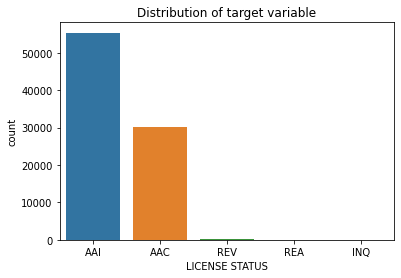

In [12]:
plt.title('Distribution of target variable')
sns.countplot(x='LICENSE STATUS', data=train)
plt.show()  

In [13]:
test.shape

(57239, 31)

### Percentage of missing null values test data

In [14]:
test.isnull().sum().sort_values(ascending=False) * 100 / len(train)

APPLICATION CREATED DATE             51.908726
SSA                                  48.118051
LICENSE STATUS CHANGE DATE           27.063275
LICENSE APPROVED FOR ISSUANCE         2.769661
PRECINCT                              1.837127
POLICE DISTRICT                       1.717213
PAYMENT DATE                          1.223587
LOCATION                              1.059433
LATITUDE                              1.059433
LONGITUDE                             1.059433
WARD                                  0.728797
WARD PRECINCT                         0.717155
APPLICATION REQUIREMENTS COMPLETE     0.498283
LICENSE TERM START DATE               0.137377
ZIP CODE                              0.013971
LICENSE TERM EXPIRATION DATE          0.006985
DOING BUSINESS AS NAME                0.002328
DATE ISSUED                           0.000000
CONDITIONAL APPROVAL                  0.000000
ID                                    0.000000
APPLICATION TYPE                      0.000000
LICENSE NUMBE

## Handling null values

### In order to handle date-time null values first we have to convert it into date-time data type

In [15]:
def date_(date_list):
    for i in date_list:
        train[i] = pd.to_datetime(train[i])
        test[i] = pd.to_datetime(test[i])

In [16]:
date_list = ['APPLICATION REQUIREMENTS COMPLETE', 'PAYMENT DATE', 'LICENSE TERM EXPIRATION DATE', 'LICENSE TERM START DATE',
             'DATE ISSUED', 'LICENSE APPROVED FOR ISSUANCE', 'LICENSE STATUS CHANGE DATE']
date_(date_list)

### Date-Time conversion to subsequent year values

In [17]:
train['APPLICATION REQUIREMENTS COMPLETE YEAR']=train['APPLICATION REQUIREMENTS COMPLETE'].dt.year
train['PAYMENT YEAR']=train['PAYMENT DATE'].dt.year
train['LICENSE TERM EXPIRATION YEAR']=train['LICENSE TERM EXPIRATION DATE'].dt.year
train['LICENSE TERM START YEAR']=train['LICENSE TERM START DATE'].dt.year
train['DATE ISSUED YEAR']=train['DATE ISSUED'].dt.year
train['LICENSE APPROVED FOR ISSUANCE YEAR']=train['LICENSE APPROVED FOR ISSUANCE'].dt.year
train['LICENSE STATUS CHANGE YEAR']=train['LICENSE STATUS CHANGE DATE'].dt.year



In [18]:
test['APPLICATION REQUIREMENTS COMPLETE YEAR']=test['APPLICATION REQUIREMENTS COMPLETE'].dt.year
test['PAYMENT YEAR']=test['PAYMENT DATE'].dt.year
test['LICENSE TERM EXPIRATION YEAR']=test['LICENSE TERM EXPIRATION DATE'].dt.year
test['LICENSE TERM START YEAR']=test['LICENSE TERM START DATE'].dt.year
test['DATE ISSUED YEAR']=test['DATE ISSUED'].dt.year
test['LICENSE APPROVED FOR ISSUANCE YEAR']=test['LICENSE APPROVED FOR ISSUANCE'].dt.year
test['LICENSE STATUS CHANGE YEAR']=test['LICENSE STATUS CHANGE DATE'].dt.year

### Year Null values replaced by mode of that coloum

In [19]:
# fill Year missing values
def fillnull(date_mode):
  for i in date_mode:
    train[i]=train[i].fillna(value=train[i].mode())
    test[i]=test[i].fillna(value=test[i].mode())


### Dropping original Date-time object columns

In [20]:
train = train.drop(date_list, axis=1)
test = test.drop(date_list, axis=1)
train.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,LONGITUDE,LOCATION,LICENSE STATUS,APPLICATION REQUIREMENTS COMPLETE YEAR,PAYMENT YEAR,LICENSE TERM EXPIRATION YEAR,LICENSE TERM START YEAR,DATE ISSUED YEAR,LICENSE APPROVED FOR ISSUANCE YEAR,LICENSE STATUS CHANGE YEAR
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623.0,...,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI,2002.0,2002.0,2003.0,2002.0,2006,2002.0,NaN
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,...,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC,2005.0,2005.0,2006.0,2005.0,2006,2006.0,2006.0
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,...,NaN,NaN,AAI,2009.0,2009.0,2011.0,2009.0,2009,2009.0,NaN
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,...,NaN,NaN,AAI,2004.0,2004.0,2005.0,2004.0,2004,2004.0,NaN
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,...,NaN,NaN,AAI,2008.0,2008.0,2010.0,2008.0,2008,2008.0,NaN


In [21]:
date_mode = ['LICENSE TERM EXPIRATION YEAR', 'LICENSE TERM START YEAR', 'PAYMENT YEAR', 'LICENSE APPROVED FOR ISSUANCE YEAR',
                 'APPLICATION REQUIREMENTS COMPLETE YEAR', 'LICENSE STATUS CHANGE YEAR']
fillnull(date_mode) 
test.head()            

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,LATITUDE,LONGITUDE,LOCATION,APPLICATION REQUIREMENTS COMPLETE YEAR,PAYMENT YEAR,LICENSE TERM EXPIRATION YEAR,LICENSE TERM START YEAR,DATE ISSUED YEAR,LICENSE APPROVED FOR ISSUANCE YEAR,LICENSE STATUS CHANGE YEAR
0,1516615-20120216,2132209,280120,1,RS HOMES I LLC,RS HOMES I LLC,350 W HUBBARD ST 3 300,CHICAGO,IL,60610.0,...,41.890047,-87.637467,"{'latitude': '41.89004724888915', 'longitude':...",2011.0,2012.0,2014.0,2012.0,2012,2012.0,2012.0
1,69813-20110616,2090759,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,2101 W 59TH ST 1ST,CHICAGO,IL,60636.0,...,41.786485,-87.676665,"{'latitude': '41.786485235679486', 'longitude'...",2011.0,2012.0,2013.0,2011.0,2012,2012.0,2012.0
2,1519227-20041116,1541990,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,1133 S WABASH AVE 1ST,CHICAGO,IL,60605.0,...,41.868269,-87.625695,"{'latitude': '41.86826924843568', 'longitude':...",2004.0,2004.0,2005.0,2004.0,2004,2004.0,2012.0
3,1922025-20100816,2041053,335243,1,ANNA F. JAMISON,ANNA F. JAMISON,13156 S FORRESTVILLE AVE,CHICAGO,IL,60827.0,...,41.655762,-87.608686,"{'latitude': '41.65576175146191', 'longitude':...",2010.0,2010.0,2012.0,2010.0,2010,2008.0,2012.0
4,1675683-20070816,1837158,283018,3,MARINCA A. COVARRUBIAS,DETAILS,4208 S ARCHER AVE,CHICAGO,IL,60632.0,...,41.816969,-87.699785,"{'latitude': '41.81696910012824', 'longitude':...",2007.0,2007.0,2009.0,2007.0,2007,2007.0,2008.0


In [23]:
def fillnull_(fillnull_col):
  for i in fillnull_col:
    train[i]=train[i].fillna(value=train[i].mean())
    test[i]=test[i].fillna(value=test[i].mean())

### Lat and Long values replaced by mean

In [24]:
fill_list=['LATITUDE', 'LONGITUDE']
fillnull_(fill_list)

In [25]:
train.isnull().sum().sort_values(ascending=False) * 100 / len(train)

SSA                                       88.999360
APPLICATION CREATED DATE                  75.277956
PRECINCT                                  66.011991
POLICE DISTRICT                           62.881425
WARD                                      57.862507
WARD PRECINCT                             57.861342
LOCATION                                  55.004366
ZIP CODE                                   0.036091
DOING BUSINESS AS NAME                     0.001164
LICENSE NUMBER                             0.001164
APPLICATION REQUIREMENTS COMPLETE YEAR     0.000000
PAYMENT YEAR                               0.000000
LICENSE TERM EXPIRATION YEAR               0.000000
LICENSE TERM START YEAR                    0.000000
DATE ISSUED YEAR                           0.000000
LICENSE STATUS                             0.000000
LICENSE APPROVED FOR ISSUANCE YEAR         0.000000
LONGITUDE                                  0.000000
LATITUDE                                   0.000000
ID          

### Null values are more than 50% ,so I dropped

In [26]:
drop = ['APPLICATION CREATED DATE', 'SSA', 'LICENSE ID']

In [27]:
train = train.drop(drop, axis=1)
test = test.drop(drop, axis=1)

In [28]:
train.head()

,ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,WARD,...,LONGITUDE,LOCATION,LICENSE STATUS,APPLICATION REQUIREMENTS COMPLETE YEAR,PAYMENT YEAR,LICENSE TERM EXPIRATION YEAR,LICENSE TERM START YEAR,DATE ISSUED YEAR,LICENSE APPROVED FOR ISSUANCE YEAR,LICENSE STATUS CHANGE YEAR
0,35342-20020816,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623.0,22.0,...,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI,2002.0,2002.0,2003.0,2002.0,2006,2002.0,2012.0
1,1358463-20051116,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,33.0,...,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC,2005.0,2005.0,2006.0,2005.0,2006,2006.0,2006.0
2,1980233-20090722,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,NaN,...,-87.681165,NaN,AAI,2009.0,2009.0,2011.0,2009.0,2009,2009.0,2012.0
3,1476582-20040211,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,NaN,...,-87.681165,NaN,AAI,2004.0,2004.0,2005.0,2004.0,2004,2004.0,2012.0
4,1141408-20080516,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,NaN,...,-87.681165,NaN,AAI,2008.0,2008.0,2010.0,2008.0,2008,2008.0,2012.0


### Doing Business as Name & Legal Name have very common values .I try to get useful information from these two coloumns

In [29]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
train['DOING BUSINESS AS NAME'].str.split(' ').str[-1].value_counts().head(60)


INC             11823
INC.            10526
LLC              3052
CONSTRUCTION     2387
CO               1618
Inc.             1441
SERVICES         1281
COMPANY          1228
SERVICE          1202
CORPORATION      1039
CORP             1031
COOLING           862
CO.               693
METRO             630
LTD               565
CORP.             524
SHOP              441
REMODELING        392
SALON             386
REPAIR            346
Inc               340
CENTER            329
CONTRACTORS       321
GROUP             320
HEATING           319
LANDSCAPING       293
CLEANERS          289
CHICAGO           265
ASSOCIATES        263
MECHANICAL        260
DESIGN            258
INCORPORATED      255
BUILDERS          245
MART              225
LTD.              225
ENTERPRISES       206
L.L.C.            198
STORE             193
CONDITIONING      193
NAILS             184
CONTRACTOR        183
SYSTEMS           183
HVAC              172
AMUSEMENT         167
RESTAURANT        164
LLC.      

In [30]:
train['DOING BUSINESS AS NAME'].fillna('Empty')
test['DOING BUSINESS AS NAME'].fillna('Empty')
train['DOING BUSINESS AS NAME'] = train['DOING BUSINESS AS NAME'].str.replace('.', '', regex=False)
test['DOING BUSINESS AS NAME'] = test['DOING BUSINESS AS NAME'].str.replace('.', '', regex=False)


In [31]:
train['DOING BUSINESS AS NAME'].str.split(' ').str[-1].value_counts().head(60)

INC             22357
LLC              3416
CONSTRUCTION     2388
CO               2311
Inc              1785
CORP             1555
SERVICES         1288
COMPANY          1228
SERVICE          1202
CORPORATION      1039
COOLING           862
LTD               790
METRO             630
SHOP              443
REMODELING        394
SALON             386
REPAIR            346
CENTER            330
CONTRACTORS       321
GROUP             320
HEATING           319
LANDSCAPING       293
CLEANERS          289
CHICAGO           266
ASSOCIATES        263
MECHANICAL        260
DESIGN            258
INCORPORATED      255
BUILDERS          245
MART              226
ENTERPRISES       206
CONDITIONING      193
STORE             193
HVAC              189
JR                187
NAILS             184
CONTRACTOR        183
SYSTEMS           183
AMUSEMENT         167
RESTAURANT        164
CLEANING          152
DEVELOPMENT       151
SOLUTIONS         148
PLUMBING          137
SPA               131
CONTRACTIN

### I observed Legal entity name such as Limited, Corporation,INC is repeating along with type of bussiness.So I tried to make a coloum of legal entities ( last word of DOING BUSINESS AS NAME column string)

In [32]:
train['DOING BUSINESS AS NAME']=train['DOING BUSINESS AS NAME'].str.split(' ').str[-1]

In [33]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
train['LEGAL NAME'].str.split(' ').str[-1].value_counts().head(50)

INC.            20225
INC             13562
LLC              5518
CORPORATION      1874
Inc.             1470
COMPANY          1282
CO               1216
CORP             1012
CORP.             928
CO.               777
INCORPORATED      655
LTD.              516
CONSTRUCTION      461
L.L.C.            453
LIMITED           435
Inc               354
LTD               307
SERVICES          259
JR.               254
LLC.              240
SERVICE           222
KIM               213
SR.               189
MARTINEZ          183
JR                181
COOLING           175
LOPEZ             156
GARCIA            156
SMITH             140
JOHNSON           139
TORRES            127
SR                124
CONTRACTORS       122
WILLIAMS          121
JONES             120
PEREZ             117
BROWN             115
HERNANDEZ         114
IN                113
GROUP             111
CHICAGO           107
Corporation       103
THOMAS            103
I                 101
RODRIGUEZ         100
LEE       

In [34]:
train['LEGAL NAME'].apply(lambda x: x.upper())
test['LEGAL NAME'].apply(lambda x: x.upper())
train['LEGAL NAME'] = train['LEGAL NAME'].str.replace('.', '', regex=False)
test['LEGAL NAME'] = test['LEGAL NAME'].str.replace('.', '', regex=False)

### Same logic applied to Legal Name Column as Doing Bussiness as Name

In [35]:
train['LEGAL NAME'].str.split(' ').str[-1].value_counts().head(50)

INC             33792
LLC              6218
CO               1996
CORP             1940
CORPORATION      1876
Inc              1824
COMPANY          1283
LTD               823
INCORPORATED      656
CONSTRUCTION      461
LIMITED           456
JR                435
SR                313
SERVICES          260
SERVICE           222
KIM               213
MARTINEZ          183
LP                179
COOLING           175
LOPEZ             156
GARCIA            156
SMITH             140
JOHNSON           139
TORRES            127
CONTRACTORS       122
WILLIAMS          121
JONES             120
PEREZ             117
BROWN             115
HERNANDEZ         114
IN                113
GROUP             111
CHICAGO           107
Corporation       103
THOMAS            103
I                 101
RODRIGUEZ         100
LEE                98
HEATING            98
Co                 89
ILLINOIS           88
SYSTEMS            84
NGUYEN             84
PC                 82
FLORES             80
Corp      

In [36]:
train['LEGAL NAME']=train['LEGAL NAME'].str.split(' ').str[-1]

In [37]:
train['LEGAL ENTITY'] = 'OTHER'
test['LEGAL ENTITY'] = 'OTHER'

In [38]:
train['LEGAL ENTITY'] = np.where(train['LEGAL NAME'].str.contains('LTD' or 'LIMITED' or 'limited' or 'Limited'), 'LTD', train['LEGAL ENTITY'])
train['LEGAL ENTITY'] = np.where(train['DOING BUSINESS AS NAME'].str.contains('LTD' or 'LIMITED'  ), 'LTD', train['LEGAL ENTITY'])
test['LEGAL ENTITY'] = np.where(test['LEGAL NAME'].str.contains('LTD' or 'LIMITED' or 'limited' or 'Limited'), 'LTD', test['LEGAL ENTITY'])
test['LEGAL ENTITY']=  np.where(test['DOING BUSINESS AS NAME'].str.contains('LTD' or 'LIMITED'  ), 'LTD', test['LEGAL ENTITY'])

In [39]:
L1=['INC','INCORPORATED','Inc','inc']
train['LEGAL ENTITY'] = np.where(train['LEGAL NAME'].str.contains('INC' or 'INCORPORATED' or 'Inc' or 'inc'),'INC', train['LEGAL ENTITY'])
train['LEGAL ENTITY'] = np.where(train['DOING BUSINESS AS NAME'].str.contains('INC' or 'INCORPORATED' or 'Inc' or 'inc'),'INC', train['LEGAL ENTITY'])
test['LEGAL ENTITY']= np.where(test['LEGAL NAME'].str.contains('INC' or 'INCORPORATED' or 'Inc' or 'inc'),'INC', test['LEGAL ENTITY'])
test['LEGAL ENTITY']=  np.where(test['DOING BUSINESS AS NAME'].str.contains('INC' or 'INCORPORATED' or 'Inc' or 'inc'),'INC', test['LEGAL ENTITY'])

In [40]:
train['LEGAL ENTITY'] = np.where(train['LEGAL NAME'].str.contains('CO' or 'CORPORATION' or 'CORP' or 'Co'), 'CORP', train['LEGAL ENTITY'])
train['LEGAL ENTITY'] = np.where(train['DOING BUSINESS AS NAME'].str.contains('CO' or 'Co' or 'CORPORATION' or 'CORP'), 'CORP', train['LEGAL ENTITY'])
test['LEGAL ENTITY']= np.where(test['LEGAL NAME'].str.contains('CO' or 'CORPORATION' or 'CORP' or 'Co'), 'CORP', test['LEGAL ENTITY'])
test['LEGAL ENTITY']= np.where(test['DOING BUSINESS AS NAME'].str.contains('CO' or 'Co' or 'CORPORATION' or 'CORP'), 'CORP', test['LEGAL ENTITY'])


In [41]:
train['LEGAL ENTITY'] = np.where(train['LEGAL NAME'].str.contains('LLC' or 'Llc' or 'llc'), 'LLC', train['LEGAL ENTITY'])
train['LEGAL ENTITY']  = np.where(train['DOING BUSINESS AS NAME'].str.contains('LLC'), 'LLC', train['LEGAL ENTITY'])

test['LEGAL ENTITY']= np.where(test['LEGAL NAME'].str.contains('LLC' or 'Llc' or 'llc'), 'LLC', test['LEGAL ENTITY'])
test['LEGAL ENTITY']= np.where(test['DOING BUSINESS AS NAME'].str.contains('LLC'), 'LLC', test['LEGAL ENTITY'])

### I deleted 'DOING BUSINESS AS NAME','LEGAL NAME' and created a new coloumn 'LEGAL ENTITY' and populate it with useful information

In [42]:
print(train['LEGAL ENTITY'] .value_counts())
print(test['LEGAL ENTITY'] .value_counts())


INC      33100
OTHER    29535
CORP     15788
LLC       6416
LTD       1056
Name: LEGAL ENTITY, dtype: int64
INC      19674
OTHER    17876
CORP     12553
LLC       6187
LTD        949
Name: LEGAL ENTITY, dtype: int64


In [ ]:
train.head()

In [44]:
drop1=['DOING BUSINESS AS NAME','LEGAL NAME']
train = train.drop(drop1, axis=1)
test = test.drop(drop1, axis=1)
train.head()

,ID,ACCOUNT NUMBER,SITE NUMBER,ADDRESS,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,CONDITIONAL APPROVAL,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS,APPLICATION REQUIREMENTS COMPLETE YEAR,PAYMENT YEAR,LICENSE TERM EXPIRATION YEAR,LICENSE TERM START YEAR,DATE ISSUED YEAR,LICENSE APPROVED FOR ISSUANCE YEAR,LICENSE STATUS CHANGE YEAR,LEGAL ENTITY
0,35342-20020816,32811,1,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623.0,22.0,28.0,22-28,10.0,1010,Limited Business License,35342.0,RENEW,N,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI,2002.0,2002.0,2003.0,2002.0,2006,2002.0,2012.0,OTHER
1,1358463-20051116,262311,29,2825 W MONTROSE AVE,CHICAGO,IL,60618,33.0,23.0,33-23,17.0,1315,Mobile Food Dispenser,1358463.0,RENEW,N,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC,2005.0,2005.0,2006.0,2005.0,2006,2006.0,2006.0,INC
2,1980233-20090722,345008,1,1605 CLAVEY RD 1,HIGHLAND,IL,60035,NaN,NaN,NaN,NaN,1011,Home Repair,1980233.0,ISSUE,N,41.880952,-87.681165,NaN,AAI,2009.0,2009.0,2011.0,2009.0,2009,2009.0,2012.0,INC
3,1476582-20040211,273121,1,8 NORTH TRAIL,LEMONT,IL,60439,NaN,NaN,NaN,NaN,1010,Limited Business License,1476582.0,ISSUE,N,41.880952,-87.681165,NaN,AAI,2004.0,2004.0,2005.0,2004.0,2004,2004.0,2012.0,CORP
4,1141408-20080516,213785,1,4081 JOSEPH DR,WAUKEGAN,IL,60087,NaN,NaN,NaN,NaN,1010,Limited Business License,1141408.0,RENEW,N,41.880952,-87.681165,NaN,AAI,2008.0,2008.0,2010.0,2008.0,2008,2008.0,2012.0,OTHER


### Null values is greater than 50 percent in training data.So I dropped the columns

In [45]:
drop1=['WARD', 'PRECINCT', 'POLICE DISTRICT', 'WARD PRECINCT','LOCATION']
train = train.drop(drop1, axis=1)
test = test.drop(drop1, axis=1)

### Null values replaced with 0

In [46]:
null_list = ['ZIP CODE','LICENSE NUMBER']
def null(imp_nil_list):
    for i in imp_nil_list:
        train[i] = train[i].fillna(0)
        test[i] = test[i].fillna(0)


null(null_list)    


## All null values are Handled

In [47]:
train.isnull().sum().sort_values(ascending=False) * 100 / len(train)

ID                                        0.0
LATITUDE                                  0.0
LICENSE STATUS CHANGE YEAR                0.0
LICENSE APPROVED FOR ISSUANCE YEAR        0.0
DATE ISSUED YEAR                          0.0
LICENSE TERM START YEAR                   0.0
LICENSE TERM EXPIRATION YEAR              0.0
PAYMENT YEAR                              0.0
APPLICATION REQUIREMENTS COMPLETE YEAR    0.0
LICENSE STATUS                            0.0
LONGITUDE                                 0.0
CONDITIONAL APPROVAL                      0.0
ACCOUNT NUMBER                            0.0
APPLICATION TYPE                          0.0
LICENSE NUMBER                            0.0
LICENSE DESCRIPTION                       0.0
LICENSE CODE                              0.0
ZIP CODE                                  0.0
STATE                                     0.0
CITY                                      0.0
ADDRESS                                   0.0
SITE NUMBER                       

In [48]:
test.isnull().sum().sort_values(ascending=False) * 100 / len(train)

ID                                        0.0
ACCOUNT NUMBER                            0.0
LICENSE STATUS CHANGE YEAR                0.0
LICENSE APPROVED FOR ISSUANCE YEAR        0.0
DATE ISSUED YEAR                          0.0
LICENSE TERM START YEAR                   0.0
LICENSE TERM EXPIRATION YEAR              0.0
PAYMENT YEAR                              0.0
APPLICATION REQUIREMENTS COMPLETE YEAR    0.0
LONGITUDE                                 0.0
LATITUDE                                  0.0
CONDITIONAL APPROVAL                      0.0
APPLICATION TYPE                          0.0
LICENSE NUMBER                            0.0
LICENSE DESCRIPTION                       0.0
LICENSE CODE                              0.0
ZIP CODE                                  0.0
STATE                                     0.0
CITY                                      0.0
ADDRESS                                   0.0
SITE NUMBER                               0.0
LEGAL ENTITY                      

License Description drop

### Due to time constraint I can't able to extract any useful information from this column ,So I dropped the column.I have some ideas I can share while presenting

In [49]:
train = train.drop('LICENSE DESCRIPTION', axis=1)
test = test.drop('LICENSE DESCRIPTION', axis=1)


### I can't encode this column and also I aleeady have 'STATE', 'CITY', 'ZIP CODE'.So I dropped Address column

In [50]:
train = train.drop('ADDRESS', axis=1)
test = test.drop('ADDRESS', axis=1)

In [51]:
train.dtypes

ID                                         object
ACCOUNT NUMBER                              int64
SITE NUMBER                                 int64
CITY                                       object
STATE                                      object
ZIP CODE                                   object
LICENSE CODE                                int64
LICENSE NUMBER                            float64
APPLICATION TYPE                           object
CONDITIONAL APPROVAL                       object
LATITUDE                                  float64
LONGITUDE                                 float64
LICENSE STATUS                             object
APPLICATION REQUIREMENTS COMPLETE YEAR    float64
PAYMENT YEAR                              float64
LICENSE TERM EXPIRATION YEAR              float64
LICENSE TERM START YEAR                   float64
DATE ISSUED YEAR                            int64
LICENSE APPROVED FOR ISSUANCE YEAR        float64
LICENSE STATUS CHANGE YEAR                float64


## Handling Categorical Values

### One Hot Encoding is prferred where No. of unique values is less
### Label Encoding is preferred if No. of unique values is large

In [52]:
  train.nunique()

ID                                        85895
ACCOUNT NUMBER                            38897
SITE NUMBER                                 177
CITY                                       1223
STATE                                        54
ZIP CODE                                   2457
LICENSE CODE                                106
LICENSE NUMBER                            49769
APPLICATION TYPE                              5
CONDITIONAL APPROVAL                          2
LATITUDE                                  21387
LONGITUDE                                 21389
LICENSE STATUS                                5
APPLICATION REQUIREMENTS COMPLETE YEAR       17
PAYMENT YEAR                                 17
LICENSE TERM EXPIRATION YEAR                 25
LICENSE TERM START YEAR                      21
DATE ISSUED YEAR                             15
LICENSE APPROVED FOR ISSUANCE YEAR           17
LICENSE STATUS CHANGE YEAR                   15
LEGAL ENTITY                            

### We will do One Hot Encoding for APPLICATION TYPE, COND. APPROVAL & LEGAL ENTITY

In [53]:
Cat_col=['LEGAL ENTITY','APPLICATION TYPE','CONDITIONAL APPROVAL']
train=pd.get_dummies(train, columns=Cat_col)
test=pd.get_dummies(test, columns=Cat_col)


### Label Encoding for other object types

In [54]:
categ = ['CITY','STATE']
le = LabelEncoder()

train[categ] = train[categ].apply(lambda col: le.fit_transform(col))
test[categ] = test[categ].apply(lambda col: le.fit_transform(col))
train.head()

,ID,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,LICENSE CODE,LICENSE NUMBER,LATITUDE,LONGITUDE,LICENSE STATUS,APPLICATION REQUIREMENTS COMPLETE YEAR,PAYMENT YEAR,LICENSE TERM EXPIRATION YEAR,LICENSE TERM START YEAR,DATE ISSUED YEAR,LICENSE APPROVED FOR ISSUANCE YEAR,LICENSE STATUS CHANGE YEAR,LEGAL ENTITY_CORP,LEGAL ENTITY_INC,LEGAL ENTITY_LLC,LEGAL ENTITY_LTD,LEGAL ENTITY_OTHER,APPLICATION TYPE_C_CAPA,APPLICATION TYPE_C_EXPA,APPLICATION TYPE_C_LOC,APPLICATION TYPE_ISSUE,APPLICATION TYPE_RENEW,CONDITIONAL APPROVAL_N,CONDITIONAL APPROVAL_Y
0,35342-20020816,32811,1,193,16,60623.0,1010,35342.0,41.843613,-87.714618,AAI,2002.0,2002.0,2003.0,2002.0,2006,2002.0,2012.0,0,0,0,0,1,0,0,0,0,1,1,0
1,1358463-20051116,262311,29,193,16,60618,1315,1358463.0,41.961132,-87.699626,AAC,2005.0,2005.0,2006.0,2005.0,2006,2006.0,2006.0,0,1,0,0,0,0,0,0,0,1,1,0
2,1980233-20090722,345008,1,466,16,60035,1011,1980233.0,41.880952,-87.681165,AAI,2009.0,2009.0,2011.0,2009.0,2009,2009.0,2012.0,0,1,0,0,0,0,0,0,1,0,1,0
3,1476582-20040211,273121,1,585,16,60439,1010,1476582.0,41.880952,-87.681165,AAI,2004.0,2004.0,2005.0,2004.0,2004,2004.0,2012.0,1,0,0,0,0,0,0,0,1,0,1,0
4,1141408-20080516,213785,1,1145,16,60087,1010,1141408.0,41.880952,-87.681165,AAI,2008.0,2008.0,2010.0,2008.0,2008,2008.0,2012.0,0,0,0,0,1,0,0,0,0,1,1,0


In [55]:
encoder = LabelEncoder()
train["ZIP CODE"] = encoder.fit_transform(train["ZIP CODE"].astype(str))
test["ZIP CODE"] = encoder.fit_transform(test["ZIP CODE"].astype(str))
test.head()

,ID,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,LICENSE CODE,LICENSE NUMBER,LATITUDE,LONGITUDE,APPLICATION REQUIREMENTS COMPLETE YEAR,PAYMENT YEAR,LICENSE TERM EXPIRATION YEAR,LICENSE TERM START YEAR,DATE ISSUED YEAR,LICENSE APPROVED FOR ISSUANCE YEAR,LICENSE STATUS CHANGE YEAR,LEGAL ENTITY_CORP,LEGAL ENTITY_INC,LEGAL ENTITY_LLC,LEGAL ENTITY_LTD,LEGAL ENTITY_OTHER,APPLICATION TYPE_C_CAPA,APPLICATION TYPE_C_EXPA,APPLICATION TYPE_C_LOC,APPLICATION TYPE_C_SBA,APPLICATION TYPE_ISSUE,APPLICATION TYPE_RENEW,CONDITIONAL APPROVAL_N,CONDITIONAL APPROVAL_Y
0,1516615-20120216,280120,1,59,13,256,1020,1516615.0,41.890047,-87.637467,2011.0,2012.0,2014.0,2012.0,2012,2012.0,2012.0,0,0,1,0,0,0,0,0,0,0,1,1,0
1,69813-20110616,65043,1,59,13,281,1010,69813.0,41.786485,-87.676665,2011.0,2012.0,2013.0,2011.0,2012,2012.0,2012.0,0,1,0,0,0,0,0,0,0,0,1,1,0
2,1519227-20041116,281270,1,59,13,251,1020,1519227.0,41.868269,-87.625695,2004.0,2004.0,2005.0,2004.0,2004,2004.0,2012.0,0,0,1,0,0,0,0,0,0,0,1,1,0
3,1922025-20100816,335243,1,59,13,312,1607,1922025.0,41.655762,-87.608686,2010.0,2010.0,2012.0,2010.0,2010,2008.0,2012.0,0,0,0,0,1,0,0,0,0,0,1,1,0
4,1675683-20070816,283018,3,59,13,277,1010,1675683.0,41.816969,-87.699785,2007.0,2007.0,2009.0,2007.0,2007,2007.0,2008.0,1,0,0,0,0,0,0,0,0,0,1,1,0


### Encoding Target Variable

In [56]:
train["LICENSE STATUS"] = train["LICENSE STATUS"].replace('AAI', 0)
train["LICENSE STATUS"] = train["LICENSE STATUS"].replace('AAC', 1)
train["LICENSE STATUS"] = train["LICENSE STATUS"].replace('REV', 2)
train["LICENSE STATUS"] = train["LICENSE STATUS"].replace('REA', 3)
train["LICENSE STATUS"] = train["LICENSE STATUS"].replace('INQ', 4)
train["LICENSE STATUS"].value_counts()


0    55400
1    30200
2      290
3        3
4        2
Name: LICENSE STATUS, dtype: int64

In [57]:
#dropping Id coloum
train = train.drop('ID', axis=1)
test = test.drop('ID', axis=1)

In [58]:
x=train.drop('LICENSE STATUS',axis=1)
x.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85895 entries, 0 to 85894
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ACCOUNT NUMBER                          85895 non-null  int64  
 1   SITE NUMBER                             85895 non-null  int64  
 2   CITY                                    85895 non-null  int64  
 3   STATE                                   85895 non-null  int64  
 4   ZIP CODE                                85895 non-null  int64  
 5   LICENSE CODE                            85895 non-null  int64  
 6   LICENSE NUMBER                          85895 non-null  float64
 7   LATITUDE                                85895 non-null  float64
 8   LONGITUDE                               85895 non-null  float64
 9   APPLICATION REQUIREMENTS COMPLETE YEAR  85895 non-null  float64
 10  PAYMENT YEAR                            85895 non-null  fl

In [59]:
y=train['LICENSE STATUS']

## Handling Imbalanced dataset

### I used Random over Sampler to balanced the target variable
### Other techniques like SMOTE can be used
### We can also use SMOTeeen which do both undersample and oversample at same time

In [60]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler({0:55400, 1:40000, 2:20000, 3:8000, 4:5000,})
x1,y1=os.fit_resample(x,y)
y1.shape
y1.value_counts()

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy={0: 55400, 1: 40000, 2: 20000, 3: 8000, 4: 5000} as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


0    55400
1    40000
2    20000
3     8000
4     5000
Name: LICENSE STATUS, dtype: int64

In [62]:
xt2,xte2,yt1,yte1=tt(x1,y1,test_size=0.2,random_state=2)
xt2.shape

(102720, 28)

In [63]:

from sklearn.linear_model import LogisticRegression

# Create a Logistic regression classifier
lg = LogisticRegression()

# Train the model using the training sets 
lg.fit(xt2, yt1)
yp=lg.predict(xte2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### Used classification report to see the FI weighted avg score as required

In [64]:
from sklearn.metrics import accuracy_score as ar,confusion_matrix, classification_report as cr
print(cr(yte1,yp))

              precision    recall  f1-score   support

           0       0.43      1.00      0.60     11130
           1       0.59      0.01      0.01      7992
           2       0.00      0.00      0.00      3982
           3       0.00      0.00      0.00      1573
           4       0.00      0.00      0.00      1003

    accuracy                           0.43     25680
   macro avg       0.21      0.20      0.12     25680
weighted avg       0.37      0.43      0.27     25680



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random Forest Classifier

### I tried Hyperparameter optimization using GridSearchCV but due to my laptop hardware limitation ,notebook is getting crashed.


In [65]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier()

# Train the model using the training sets 
rf.fit(xt2,yt1)
yp1=rf.predict(xte2)

In [66]:
print(cr(yte1,yp1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11130
           1       0.98      0.99      0.99      7992
           2       1.00      1.00      1.00      3982
           3       1.00      1.00      1.00      1573
           4       1.00      1.00      1.00      1003

    accuracy                           0.99     25680
   macro avg       0.99      1.00      1.00     25680
weighted avg       0.99      0.99      0.99     25680



### Feature importance using Random Forest

No handles with labels found to put in legend.


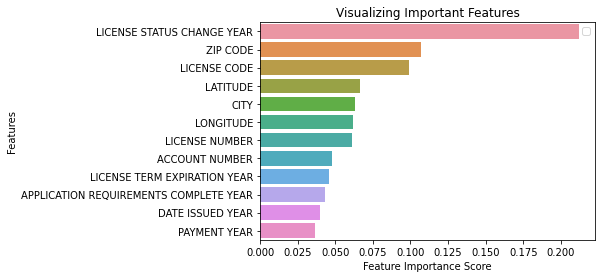

In [70]:
feature_imp = pd.Series(rf.feature_importances_,index= xt2.columns).sort_values(ascending=False)

feature_imp=feature_imp[0:12,]
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

## XGBoost

### I tried Hyperparameter optimization using GridSearchCV but due to my laptop hardware limitation ,notebook is getting crashed.

In [67]:
from xgboost import XGBClassifier , plot_importance

# Create a XGB Classifier
xg = XGBClassifier( n_estimators=10)


# Train the model using the training sets
xg.fit(xt2,yt1)
yp2=rf.predict(xte2)

In [68]:
print(cr(yte1,yp2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11130
           1       0.98      0.99      0.99      7992
           2       1.00      1.00      1.00      3982
           3       1.00      1.00      1.00      1573
           4       1.00      1.00      1.00      1003

    accuracy                           0.99     25680
   macro avg       0.99      1.00      1.00     25680
weighted avg       0.99      0.99      0.99     25680

